# EMPERICAL EXERCISE 2: [The Role of Slave Trades and Current Economic Performance](https://academic.oup.com/qje/article-abstract/123/1/139/1889789)

## NATHAN NUNN

## The Quarterly Journal of Economics, Volume 123, Issue 1, February 2008, Pages 139–176.

## For accessing the paper data, click [here](https://nathannunn.sites.olt.ubc.ca/files/2022/02/DATA-22The-Long-Term-Effects-of-Africas-Slave-Trades22-slave_trade_qje_replication_dataset.zip) and also click [here](https://nathannunn.sites.olt.ubc.ca/files/2022/02/DATA-2222The-Long-Term-Effects-of-Africas-Slave-Trades2222-Murdock.zip) for the shape file.


# Summary of the paper

**Prompt:** Summarize the paper with objectives, methodology and instrument, explanation of the instrument, data, and results.

**Objective:** Examine the impact of Africa's slave trades on its current economic underdevelopment.

**Methodology & Instrument:** Use of shipping records and historical documents to estimate the number of slaves exported from each African country as an instrumental variable.

**Reason:** The historical intensity of slave trades is employed to identify the causal effect on present-day economic performance, isolating the impact from other confounding factors.

**Data:** Compilation of slave export estimates from various sources, including the Trans-Atlantic Slave Trade Database, and data on slave ethnicities to trace the origins of slaves.

**Results:** Finds a robust negative relationship between the number of slaves exported and current economic performance, suggesting a significant adverse effect of the slave trades on economic development.



## Importing data into the Google Colab environment

**Prompt:** Write code to import data from GitHub as well as read the Stata database including the labels.

In [1]:
# How to use Data from GitHub

# Cloning the Entire Repository
!git clone https://github.com/mjahangiralam/Data-Science-for-Economic-and-Social-Issues.git

# Changing Directory to the Cloned Repository
%cd Data-Science-for-Economic-and-Social-Issues/

# If needed, change to a specific subfolder
%cd IV/NATHAN-NUNN

# Importing pandas for data handling
import pandas as pd

# Loading Data from the File
df = pd.read_stata('slave_trade_QJE.dta')

# Display the first 5 rows of the dataframe
print(df.head())

# Load the dataset but return a StataReader object instead of a DataFrame
with pd.read_stata('slave_trade_QJE.dta', iterator=True) as reader:
    # Extract variable labels
    variable_labels = reader.variable_labels()

# Display variable labels
print(variable_labels)



'git' is not recognized as an internal or external command,C:\Users\Davis\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})

operable program or batch file.


[WinError 2] The system cannot find the file specified: 'Data-Science-for-Economic-and-Social-Issues/'
c:\Users\Davis\Downloads\DATA-22The-Long-Term-Effects-of-Africas-Slave-Trades22-slave_trade_qje_replication_dataset
[WinError 3] The system cannot find the path specified: 'IV/NATHAN-NUNN'
c:\Users\Davis\Downloads\DATA-22The-Long-Term-Effects-of-Africas-Slave-Trades22-slave_trade_qje_replication_dataset
  isocode       country  ln_maddison_pcgdp2000  ln_export_area  ln_export_pop  \
0     AGO        Angola               6.670766        7.967494      14.399250   
1     BDI       Burundi               6.354370        1.140843       4.451658   
2     BEN         Benin               7.187657        8.304137      13.308970   
3     BFA  Burkina Faso               6.748760        6.413822      11.724286   
4     BWA      Botswana               8.377471       -2.302585       3.912023   

   colony0  colony1  colony2  colony3  colony4  ...  ln_avg_oil_pop  \
0      0.0      0.0      0.0      

# Visualizations:

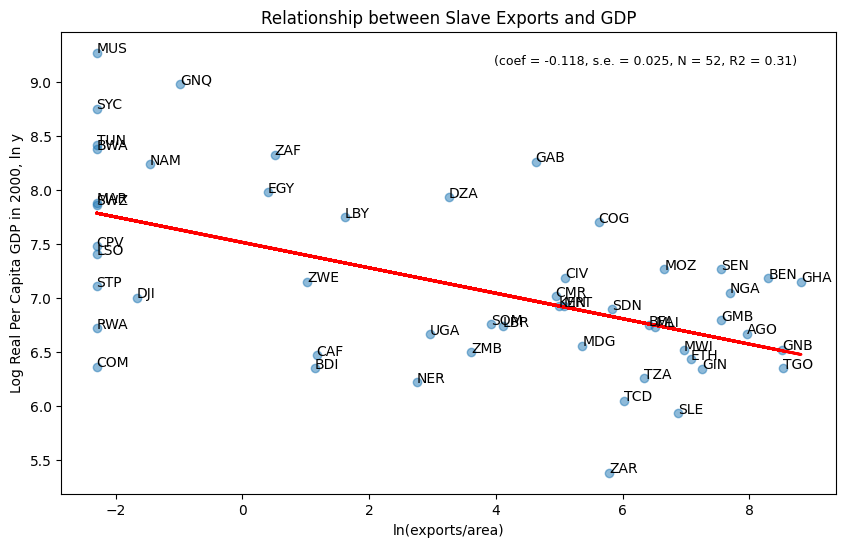

                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.309
Model:                               OLS   Adj. R-squared:                  0.295
Method:                    Least Squares   F-statistic:                     22.31
Date:                   Mon, 04 Mar 2024   Prob (F-statistic):           1.91e-05
Time:                           13:53:18   Log-Likelihood:                -53.703
No. Observations:                     52   AIC:                             111.4
Df Residuals:                         50   BIC:                             115.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Assuming df is your loaded DataFrame
# Load your dataset
# df = pd.read_stata('slave_trade_QJE.dta')  # Uncomment this line if you haven't loaded your DataFrame

# Prepare data for regression
X = sm.add_constant(df['ln_export_area'])  # Add a constant term for the intercept
y = df['ln_maddison_pcgdp2000']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get predictions
df['predictions'] = model.predict(X)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['ln_export_area'], df['ln_maddison_pcgdp2000'], alpha=0.5)

# Annotate each point with its ISO code
for i, txt in enumerate(df['isocode']):
    plt.annotate(txt, (df['ln_export_area'].iloc[i], df['ln_maddison_pcgdp2000'].iloc[i]))

# Plot regression line
plt.plot(df['ln_export_area'], df['predictions'], color='red', linewidth=2)

# Calculate standard error of the coefficient (for the slope)
slope_std_err = model.bse['ln_export_area']

# Display regression statistics on the plot
plt.text(x=0.95, y=0.95,
         s=f'(coef = {model.params["ln_export_area"]:.3f}, s.e. = {slope_std_err:.3f}, N = {len(y)}, R2 = {model.rsquared:.2f})',
         ha='right', va='top', transform=plt.gca().transAxes, fontsize=9)


# Labels and title
plt.title('Relationship between Slave Exports and GDP')
plt.xlabel('ln(exports/area)')
plt.ylabel('Log Real Per Capita GDP in 2000, ln y')

# Save the plot to a PDF file before showing it
plt.savefig('regression_plot.pdf', format='pdf', bbox_inches='tight')

plt.show()

#run regression ln_maddison_pcgdp2000 on ln_export_area
X = df['ln_export_area']
X = sm.add_constant(X)
y = df['ln_maddison_pcgdp2000']
model = sm.OLS(y, X).fit()
print(model.summary())




# Summary Statistics

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_stata('slave_trade_QJE.dta')

# Specify the variables for which you want to calculate summary statistics
variables = {
    'ln_maddison_pcgdp2000': 'Log per capita GDP - from Maddison (2003)',
    'ln_export_area': 'Log total slave exports normalized by land area',
    'ln_export_pop': 'Log total slave exports normalized by historic population',
    'abs_latitude': 'Absolute latitude',
    'longitude': 'Longitude',
    'rain_min': 'Min of monthly average rainfall (mm)',
    'humid_max': 'Max of monthly afternoon avg humidity (%)',
    'low_temp': 'Min of avg monthly low temp (C)',
    'ln_coastline_area': 'Log (coastline/land_area)',
    'island_dum': 'Indicator variable for small islands',
    'islam': 'Percent Islamic',
    'legor_fr': 'Legal origin indicator: French',
    'legor_uk': 'Legal origin indicator: British',
    'region_n': 'Region indicator: North',
    'region_s': 'Region indicator: South',
    'region_w': 'Region indicator: West',
    'region_e': 'Region indicator: East',
    'region_c': 'Region indicator: Central',
    'ln_avg_gold_pop': 'Log gold production per capita',
    'ln_avg_oil_pop': 'Log oil production per capita',
    'ln_avg_all_diamonds_pop': 'Log diamond production per capita',
    'ln_pop_dens_1400': 'Log population density in 1400',
    'atlantic_distance_minimum': 'Minimum Atlantic distance (000s of kms)',
    'indian_distance_minimum': 'Minimum Indian distance (000s of kms)',
    'saharan_distance_minimum': 'Minimum Saharan distance (000s of kms)',
    'red_sea_distance_minimum': 'Minimum Red Sea distance (000s of kms)',
    'ethnic_fractionalization': 'Ethnic fractionalization - from Alesina et al (2003)',
    'state_dev': 'State development - from Gennaioli & Rainer (2006)',
    'land_area': 'Land area in millions of square kms'
}

# Filter the dataset to include only the specified variables before calculating summary statistics
filtered_df = df[list(variables.keys())]

# Calculate summary statistics for these filtered variables
summary_stats = filtered_df.describe()

# Transpose for a better layout, matching variables with their stats
summary_stats = summary_stats.transpose()

# Reset index to make the variable names a column
summary_stats = summary_stats.reset_index()

# Map the index (variable names) to the more descriptive names
summary_stats['Variable'] = summary_stats['index'].map(variables)

# Formatting: Round mean, std, min, and max to two digits; convert N to integer
summary_stats['mean'] = summary_stats['mean'].round(2)
summary_stats['std'] = summary_stats['std'].round(2)
summary_stats['min'] = summary_stats['min'].round(2)
summary_stats['max'] = summary_stats['max'].round(2)
summary_stats['count'] = summary_stats['count'].astype(int)

# Drop the original index column and rearrange columns for the final table
summary_table = summary_stats[['Variable', 'mean', 'std', 'min', 'max', 'count']]
summary_table = summary_table.rename(columns={'count': 'N', 'mean': 'Mean', 'std': 'Std. dev.', 'min': 'Min', 'max': 'Max'})

# Print the final summary statistics table
print(summary_table)

# Specify the path and filename for your CSV file
csv_file_path = 'summary_statistics.csv'

# Save the final summary statistics table to a CSV file
summary_table.to_csv(csv_file_path, index=False)

print(f'Summary statistics table saved to {csv_file_path}')


                                             Variable   Mean  Std. dev.  \
0           Log per capita GDP - from Maddison (2003)   7.13       0.83   
1     Log total slave exports normalized by land area   3.26       3.89   
2   Log total slave exports normalized by historic...   9.26       3.68   
3                                   Absolute latitude  13.55       9.86   
4                                           Longitude  16.70      20.21   
5                Min of monthly average rainfall (mm)   8.87      16.06   
6           Max of monthly afternoon avg humidity (%)  71.67      11.95   
7                     Min of avg monthly low temp (C)   8.75       7.49   
8                           Log (coastline/land_area)  -0.24       3.24   
9                Indicator variable for small islands   0.10       0.30   
10                                    Percent Islamic  35.32      39.08   
11                     Legal origin indicator: French   0.65       0.48   
12                    Leg

# OLS Regression

In [7]:
%pip install Jinja2

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
# This line is commented out because it's a placeholder for your actual data loading line
# df = pd.read_stata('slave_trade_QJE.dta')

# Define your regression models as formulas
models = {
    '(1)': "ln_maddison_pcgdp2000 ~ ln_export_area",
    '(2)': "ln_maddison_pcgdp2000 ~ ln_export_area + abs_latitude + longitude",
    '(3)': "ln_maddison_pcgdp2000 ~ ln_export_area + abs_latitude + longitude + rain_min + humid_max",
    '(4)': "ln_maddison_pcgdp2000 ~ ln_export_area + abs_latitude + longitude + rain_min + humid_max + low_temp + ln_coastline_area",
    '(5)': "ln_maddison_pcgdp2000 ~ ln_export_area + abs_latitude + longitude + rain_min + humid_max + low_temp + ln_coastline_area + island_dum + islam",
    '(6)': "ln_maddison_pcgdp2000 ~ ln_export_area + abs_latitude + longitude + rain_min + humid_max + low_temp + ln_coastline_area + island_dum + islam + legor_fr + ln_avg_oil_pop + ln_avg_all_diamonds_pop",
}

# Placeholder for model results
results = []

# Fit each model and store results
for spec, formula in models.items():
    model = smf.ols(formula=formula, data=df).fit()
    results.append((spec, model))

# Initialize an empty DataFrame to hold summary table data
summary_data = pd.DataFrame()

# Process each model's results
for spec, model in results:
    # Extract coefficients and standard errors
    for var in model.params.index:
        coef = model.params[var]
        se = model.bse[var]
        # Determine significance
        pval = model.pvalues[var]
        stars = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.1 else ''
        # Format string to include coefficient and standard error
        summary_str = f"{coef:.3f}{stars}\n({se:.3f})"
        summary_data.at[var, spec] = summary_str

# Optionally, print or save the summary table
print(summary_data)
# summary_data.to_csv('table_iii_summary.csv')  # Save to CSV

# Save the summary table to a CSV file
summary_data.to_csv('table_iii_summary.csv')

# Save the summary table to a LaTeX file
summary_data.to_latex('table_iii_summary.tex')




[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 133.2/133.2 kB 8.2 MB/s eta 0:00:00
                                        (1)                 (2)  \
Intercept                 7.517***\n(0.126)   7.254***\n(0.250)   
ln_export_area           -0.118***\n(0.025)  -0.104***\n(0.028)   
abs_latitude                            NaN     0.018*\n(0.010)   
longitude                               NaN     -0.002\n(0.005)   
rain_min                                NaN                 NaN   
humid_max                               NaN                 NaN   
low_temp                                NaN                 NaN   
ln_coastline_area                       NaN                 NaN   
island_dum                              NaN                 NaN   
islam                                   NaN                 NaN   
legor_fr                                NaN                 NaN   
ln_avg_oil_pop                          NaN                 NaN   
ln_avg_all_diamonds_pop                 NaN     

In [14]:
%pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pip in c:\python311\lib\site-packages (22.3.1)
  Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:



ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\python311\\lib\\site-packages\\pip-22.3.1.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Two-Stage Least Squares (2SLS)

In [8]:
import pandas as pd

# Define the path to your .xlsx file
file_path = 'pwt1001.xlsx'

# Specify the 'openpyxl' engine and the sheet name you want to read
try:
    data_sheet_df = pd.read_excel(file_path, sheet_name='Data', engine='openpyxl')
    print("Sheet 'Data' loaded successfully.")
    # Display the first few rows of the DataFrame to confirm
    display(data_sheet_df.head())
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: [Errno 2] No such file or directory: 'pwt1001.xlsx'
